# 세미 프로잭트
## #01. 작업준비
### 데이터 불러오기

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [149]:
df = pd.read_excel("빚추가마지막.xlsx")
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,405.0,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,2788.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,2304.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,5231.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,5231.0,21,0.0,0


In [152]:
df.describe()

,Unnamed: 0,age,sm_year,sm_day,health_state,work_code,income,y_total,debt,y_train
count,13474.000000,13474.000000,1119.000000,2036.000000,13474.000000,8058.000000,13474.000000,13474.000000,13474.000000,13474.00000
mean,6736.500000,60.158008,28.122431,14.816306,3.374647,592.239017,5022.990426,19.061526,4101.976406,0.13463
std,3889.753098,18.949457,15.676065,7.569475,0.941579,267.824895,4202.596696,3.222149,9972.607241,0.34134
min,0.000000,17.000000,0.000000,1.000000,1.000000,111.000000,-29127.000000,11.000000,0.000000,0.00000
25%,3368.250000,46.000000,16.000000,10.000000,3.000000,314.000000,2002.250000,17.000000,0.000000,0.00000
50%,6736.500000,63.000000,29.000000,15.000000,4.000000,611.000000,4155.500000,18.000000,0.000000,0.00000
75%,10104.750000,76.000000,40.000000,20.000000,4.000000,873.000000,7056.000000,20.000000,4048.750000,0.00000
max,13473.000000,101.000000,72.000000,60.000000,5.000000,1009.000000,109910.000000,42.000000,256400.000000,1.00000


## 먼저 income 부터 
변수 변환(Transformation): 종속 변수 또는 독립 변수에 대해 적절한 변환을 시도하여 등분산성을 개선할 수 있습니다. 로그 변환, 제곱근 변환, 역수 변환 등이 사용될 수 있습니다. 이러한 변환은 데이터의 분포를 조정하여 오차 항의 분산을 조절하는 역할을 할 수 있습니다.

- income 은 NAN인거 0으로 처리 하나 0인거 뺸거

### 1) 0뺀거 부터

In [178]:
income_df = df.copy()
income_df = income_df.loc[income_df['income']>=0,:]
income_df['log_income'] = np.log1p(income_df['income'])
income_df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,log_income
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,405.0,20,10350.0,0,6.006353
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,1,abled,work,942.0,city,2788.0,29,0.0,1,7.933438
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,2304.0,18,21220.0,0,7.742836
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,855.0,city,5231.0,20,0.0,0,8.562549
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,399.0,city,5231.0,21,0.0,0,8.562549


#### 로그로 변환 후 등분산 및 정규성 검정

In [171]:
scaler = StandardScaler()
income_df['std_income'] = scaler.fit_transform(income_df[['income']])
income_df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,std_income
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,405.0,20,10350.0,0,-1.098883
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,1,abled,work,942.0,city,2788.0,29,0.0,1,-0.531832
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,2304.0,18,21220.0,0,-0.647003
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,855.0,city,5231.0,20,0.0,0,0.049497
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,399.0,city,5231.0,21,0.0,0,0.049497


#### 정규성 검정

In [179]:
stats.shapiro(income_df['log_income'])

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.97542405128479, pvalue=1.0789998175301091e-42)

#### 등분산 검정

In [4]:
no_debt = df.loc[df['debt']>0,:]
no_debt.head()
no_debt.describe()

,Unnamed: 0,age,sm_year,sm_day,health_state,work_code,income,y_total,debt,y_train
count,5439.000000,5439.000000,384.000000,1054.000000,5439.000000,3818.000000,2803.000000,5439.000000,5439.000000,5439.000000
mean,6041.779923,51.046332,24.924479,14.955408,3.647546,546.680199,318.530146,18.581357,10161.799982,0.095422
std,3737.370940,16.726255,14.962687,7.527027,0.861004,270.474263,215.422921,2.982225,13594.521006,0.293824
min,0.000000,17.000000,0.000000,1.000000,1.000000,111.000000,0.000000,11.000000,3.000000,0.000000
25%,2897.500000,39.000000,11.750000,10.000000,3.000000,312.000000,190.000000,17.000000,2096.000000,0.000000
50%,5626.000000,50.000000,25.000000,15.000000,4.000000,510.000000,270.000000,17.000000,6200.000000,0.000000
75%,9149.500000,63.000000,35.000000,20.000000,4.000000,842.000000,413.500000,19.000000,12997.000000,0.000000
max,13473.000000,101.000000,68.000000,50.000000,5.000000,1009.000000,1905.000000,38.000000,256400.000000,1.000000


### 민맥스로 스케일링했을 떄 정규성 

##### 스케일링 ㄱㄱ


In [20]:
scaler = MinMaxScaler()
income_notnull['minmax_income'] = scaler.fit_transform(income_notnull[['income']])
income_notnull.head()

C:\Users\hamin\AppData\Local\Temp\ipykernel_6092\1033881078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_notnull['minmax_income'] = scaler.fit_transform(income_notnull[['income']])


,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,disabled,work_state,work_code,region,income,y_total,debt,y_train,log_income,minmax_income
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,abled,work,942.0,city,172.0,29,0.0,1,5.153292,0.085275
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,abled,work,762.0,city,100.0,18,21220.0,0,4.615121,0.049579
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,abled,work,855.0,city,268.0,20,0.0,0,5.594711,0.132871
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,abled,work,399.0,city,140.0,21,0.0,0,4.948760,0.069410
7,7,female,83,yes,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,disabled,work,941.0,city,27.0,20,0.0,0,3.332205,0.013386


정규성 ㄱㄱ


In [24]:
income_notnull['minmax_income_log'] = scaler.fit_transform(income_notnull[['log_income']])
income_notnull.head()

C:\Users\hamin\AppData\Local\Temp\ipykernel_6092\3608094111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_notnull['minmax_income_log'] = scaler.fit_transform(income_notnull[['log_income']])


,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,work_state,work_code,region,income,y_total,debt,y_train,log_income,minmax_income,minmax_income_log
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,work,942.0,city,172.0,29,0.0,1,5.153292,0.085275,0.677186
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,work,762.0,city,100.0,18,21220.0,0,4.615121,0.049579,0.606466
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,work,855.0,city,268.0,20,0.0,0,5.594711,0.132871,0.735192
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,work,399.0,city,140.0,21,0.0,0,4.948760,0.069410,0.650309
7,7,female,83,yes,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,work,941.0,city,27.0,20,0.0,0,3.332205,0.013386,0.437880


#### 등분산성

In [32]:
income_notnull.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,work_state,work_code,region,income,y_total,debt,y_train,log_income,minmax_income,minmax_income_log
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,work,942.0,city,172.0,29,0.0,1,5.153292,0.085275,0.677186
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,work,762.0,city,100.0,18,21220.0,0,4.615121,0.049579,0.606466
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,work,855.0,city,268.0,20,0.0,0,5.594711,0.132871,0.735192
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,work,399.0,city,140.0,21,0.0,0,4.948760,0.069410,0.650309
7,7,female,83,yes,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,work,941.0,city,27.0,20,0.0,0,3.332205,0.013386,0.437880


### 0 1 나누기

In [ ]:
income_notnull['log_income']

In [34]:
income_y_0 = income_notnull.loc[income_notnull['y_train']==0,['income','log_income','y_train']]
income_y_1 = income_notnull.loc[income_notnull['y_train']==1,['income','log_income','y_train']]


In [36]:
stats.levene(income_y_0['log_income'],income_y_1['log_income'])

LeveneResult(statistic=35.28466621862222, pvalue=3.0269572776320073e-09)

In [37]:
df['income'].isnull().sum()

8081

null을 0으로 바꿔서 ㄱㄱ 


In [39]:
income_0 = df.copy()
income_0['income'].fillna(0)
income_0.isnull().sum() 


Unnamed: 0             0
gen                    0
age                    0
religion               0
edu                    0
sm_year            12355
sm_state               0
sm_day             11438
dr_mean_year           0
dr_6cup             7763
dr_hurt             7763
dr_worry            7763
preg_experience        0
health_state           0
disabled               0
work_state             0
work_code           5416
region                 0
income              8081
y_total                0
debt                   0
y_train                0
dtype: int64

In [40]:
income_notnull.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,work_state,work_code,region,income,y_total,debt,y_train,log_income,minmax_income,minmax_income_log
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,work,942.0,city,172.0,29,0.0,1,5.153292,0.085275,0.677186
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,work,762.0,city,100.0,18,21220.0,0,4.615121,0.049579,0.606466
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,work,855.0,city,268.0,20,0.0,0,5.594711,0.132871,0.735192
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,work,399.0,city,140.0,21,0.0,0,4.948760,0.069410,0.650309
7,7,female,83,yes,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,work,941.0,city,27.0,20,0.0,0,3.332205,0.013386,0.437880


In [65]:
income_notnull.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,work_state,work_code,region,income,y_total,debt,y_train,log_income,minmax_income,minmax_income_log
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,work,942.0,city,172.0,29,0.0,1,5.153292,0.085275,0.677186
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,work,762.0,city,100.0,18,21220.0,0,4.615121,0.049579,0.606466
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,work,855.0,city,268.0,20,0.0,0,5.594711,0.132871,0.735192
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,work,399.0,city,140.0,21,0.0,0,4.948760,0.069410,0.650309
7,7,female,83,yes,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,work,941.0,city,27.0,20,0.0,0,3.332205,0.013386,0.437880


In [66]:
stats.shapiro(income_notnull.loc[income_notnull['income']>30,'minmax_income'])

ShapiroResult(statistic=0.8666273355484009, pvalue=0.0)

In [73]:
test=income_notnull.loc[income_notnull['income']>30,:]
test['log_income'] = np.log1p(test['log_income'])
stats.shapiro(test['log_income'])
test.drop(['minmax_income','minmax_income_log'],axis=1,inplace=True)


C:\Users\hamin\AppData\Local\Temp\ipykernel_6092\2079086817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['log_income'] = np.log1p(test['log_income'])
C:\Users\hamin\AppData\Local\Temp\ipykernel_6092\2079086817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['minmax_income','minmax_income_log'],axis=1,inplace=True)


In [74]:
test['minmax_income'] = scaler.fit_transform(test[['income']])
test.head()

C:\Users\hamin\AppData\Local\Temp\ipykernel_6092\1771227439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['minmax_income'] = scaler.fit_transform(test[['income']])


,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,disabled,work_state,work_code,region,income,y_total,debt,y_train,log_income,minmax_income
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,abled,work,942.0,city,172.0,29,0.0,1,1.816987,0.070529
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,abled,work,762.0,city,100.0,18,21220.0,0,1.725463,0.034257
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,abled,work,855.0,city,268.0,20,0.0,0,1.886268,0.118892
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,abled,work,399.0,city,140.0,21,0.0,0,1.783183,0.054408
13,13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,...,abled,work,399.0,city,267.0,20,12921.0,0,1.885703,0.118388


In [79]:
scaler2=StandardScaler()
test['std_income'] = scaler2.fit_transform(test[['income']])

C:\Users\hamin\AppData\Local\Temp\ipykernel_6092\3568794921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['std_income'] = scaler2.fit_transform(test[['income']])


In [80]:
stats.normaltest(test['std_income'])

NormaltestResult(statistic=1831.5847753901571, pvalue=0.0)

In [61]:
income_notnull.loc[income_notnull['income']<=27,'income'].value_counts()

income
27.0    638
0.0      18
20.0      8
25.0      6
12.0      3
15.0      2
23.0      2
26.0      2
6.0       1
17.0      1
18.0      1
13.0      1
10.0      1
21.0      1
5.0       1
22.0      1
Name: count, dtype: int64

In [ ]:
=32.958552898100606,
 0.655,

In [82]:
stats.anderson(income_notnull.loc[income_notnull['income']>27,'log_income'])

AndersonResult(statistic=32.958552898100606, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.524902858369905, scale=0.6883711146150707)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [158]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13474 entries, 0 to 13473
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13474 non-null  int64  
 1   gen              13474 non-null  object 
 2   age              13474 non-null  int64  
 3   religion         13474 non-null  object 
 4   edu              13474 non-null  object 
 5   sm_year          1119 non-null   float64
 6   sm_state         13474 non-null  object 
 7   sm_day           2036 non-null   float64
 8   dr_mean_year     13474 non-null  object 
 9   dr_6cup          5711 non-null   object 
 10  dr_hurt          5711 non-null   object 
 11  dr_worry         5711 non-null   object 
 12  preg_experience  13474 non-null  object 
 13  health_state     13474 non-null  int64  
 14  disabled         13474 non-null  object 
 15  work_state       13474 non-null  object 
 16  work_code        8058 non-null   float64
 17  region      

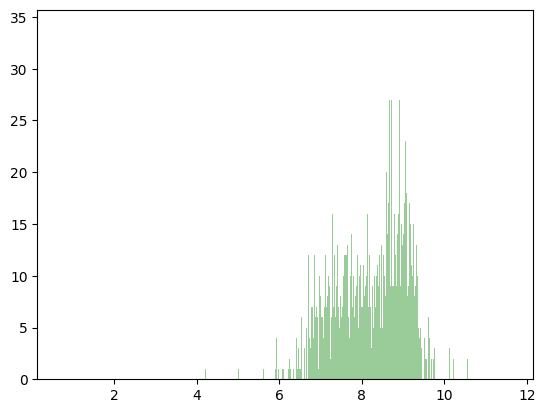

In [180]:
plt.hist(income_df['log_income'], color = 'green', alpha = 0.4, bins = 5000)
plt.show()

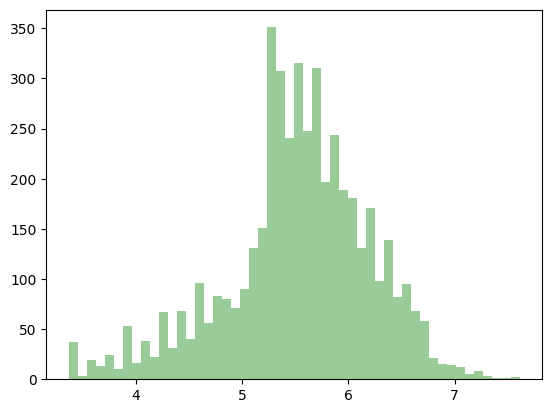

In [85]:
income_notnull.loc[income_notnull['income']>27,'log_income']
plt.hist(income_notnull.loc[income_notnull['income']>27,'log_income'], color = 'green', alpha = 0.4, bins = 50)
plt.show()

In [86]:
import statsmodels.api as sm
from scipy.stats import norm

In [181]:
data=income_df['log_income']

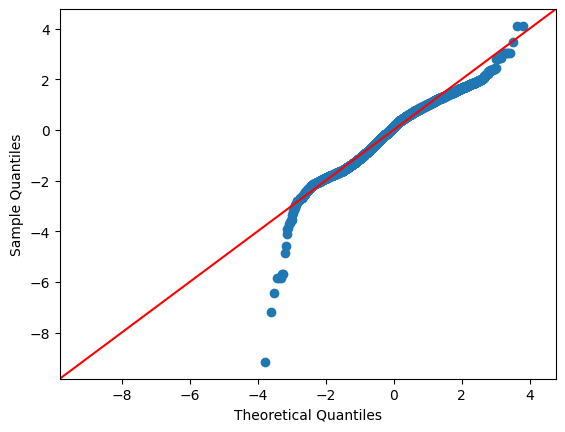

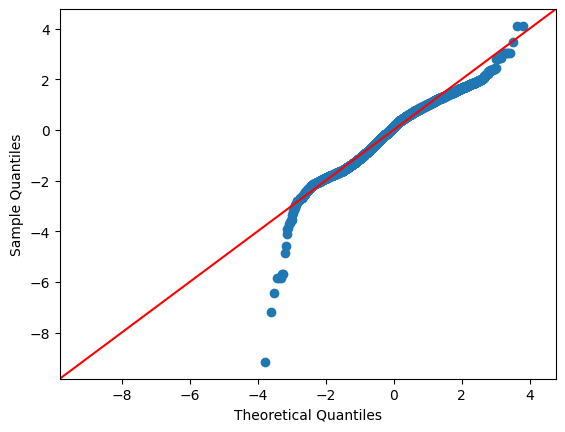

In [182]:
sm.qqplot(data,fit=True,line='45')

In [185]:
y_train_0 = income_df.loc[income_df['y_train']==0,'log_income']
y_train_1 = income_df.loc[income_df['y_train']==1,'log_income']
stats.levene(y_train_0,y_train_1)

LeveneResult(statistic=0.0006428134250557771, pvalue=0.9797731662398462)

In [95]:
data = df.copy()
data=data.loc[data['income']>27,:]
data['log_income'] = np.log1p(data['income'])

scaler=MinMaxScaler()
data['minmax_scale_income'] = scaler.fit_transform(data[['income']])


In [97]:
np.random.seed(0)
data2 = np.random.normal(loc=0, scale=1, size=100)

In [99]:
sm.qqplot(data, line='45')

TypeError: '<' not supported between instances of 'str' and 'float'

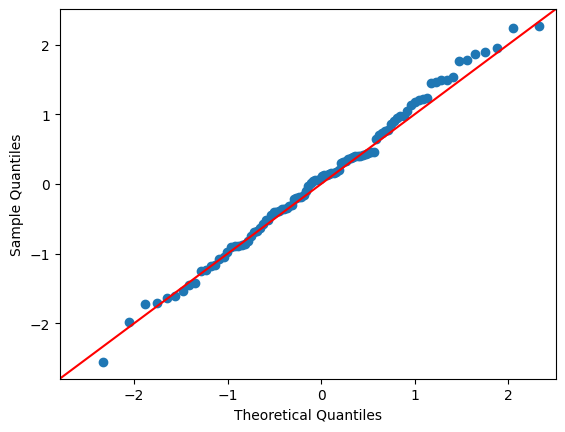

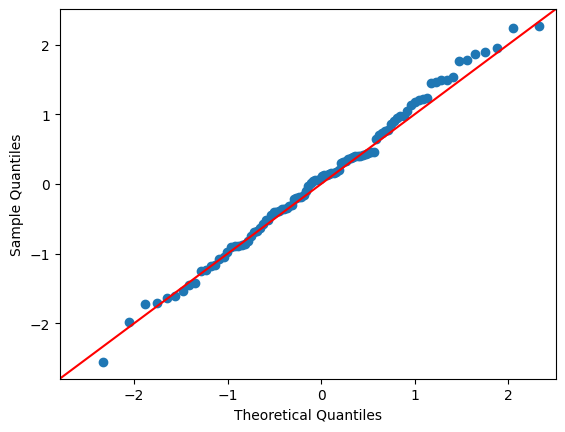

In [98]:
sm.qqplot(data2, line='45')

In [103]:
data['income'].isnull().sum()

0

In [101]:
sns.boxplot(data['income'])

KeyError: 0

In [104]:
train = df.loc[(df['income']>27),:]
train['income'].isnull().sum()

0

In [105]:
train['log_income'] = np.log1p(train['income'])
train['log_income'].head()

C:\Users\hamin\AppData\Local\Temp\ipykernel_6092\3572861558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['log_income'] = np.log1p(train['income'])


1     5.153292
2     4.615121
3     5.594711
4     4.948760
13    5.590987
Name: log_income, dtype: float64

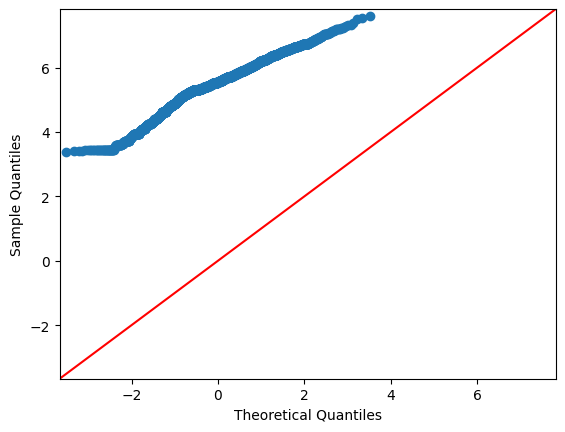

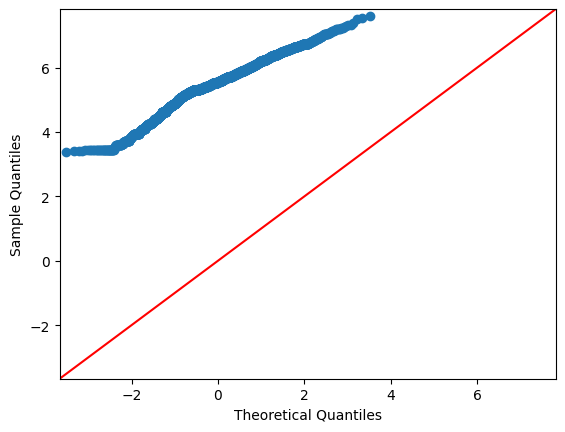

In [106]:
sm.qqplot(train['log_income'], line='45')

In [107]:
train.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,log_income
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,1,abled,work,942.0,city,172.0,29,0.0,1,5.153292
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,100.0,18,21220.0,0,4.615121
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,855.0,city,268.0,20,0.0,0,5.594711
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,399.0,city,140.0,21,0.0,0,4.948760
13,13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,...,4,abled,work,399.0,city,267.0,20,12921.0,0,5.590987


In [108]:
train['log_debt'] = np.log1p(train['debt'])
train['log_debt']

C:\Users\hamin\AppData\Local\Temp\ipykernel_6092\3874785721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['log_debt'] = np.log1p(train['debt'])


1         0.000000
2         9.962747
3         0.000000
4         0.000000
13        9.466687
           ...    
13465     8.038189
13466     8.038189
13467    10.634918
13468    10.634918
13471     9.422302
Name: log_debt, Length: 4706, dtype: float64

In [109]:
second = df.copy()
second['log_debt']=np.log1p(second['debt'])

In [118]:
a = second.loc[second['log_debt']>0,'log_debt']
a.head()

0     9.244838
2     9.962747
8     6.928538
9     6.928538
13    9.466687
Name: log_debt, dtype: float64

In [119]:
stats.shapiro(a)


c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9401207566261292, pvalue=2.4690878941403277e-42)

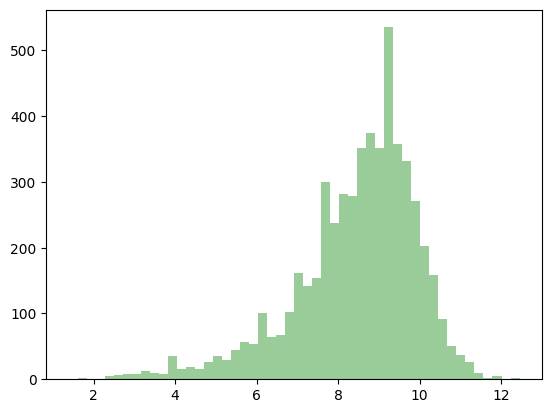

In [117]:
plt.hist(second.loc[second['log_debt']>0,'log_debt'], color = 'green', alpha = 0.4, bins = 50)
plt.show()

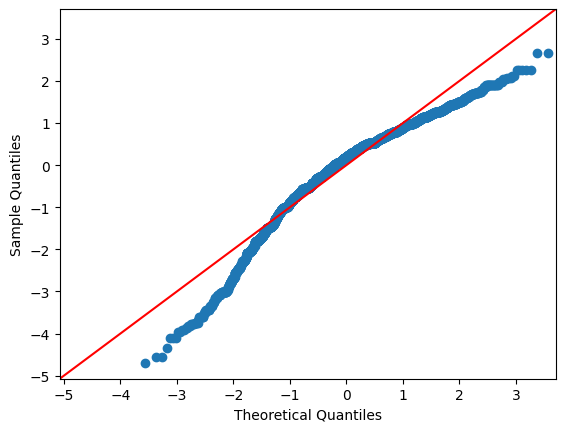

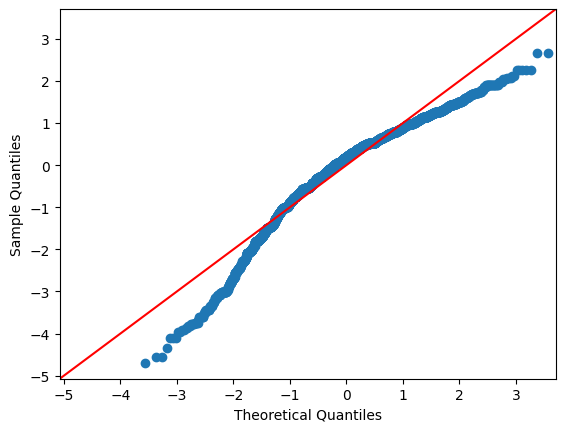

In [120]:
sm.qqplot(second.loc[second['log_debt']>0,'log_debt'],fit=True, line='45')

In [123]:
second['y_train'] = second['y_train'].astype('category')
second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13474 entries, 0 to 13473
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       13474 non-null  int64   
 1   gen              13474 non-null  object  
 2   age              13474 non-null  int64   
 3   religion         13474 non-null  object  
 4   edu              13474 non-null  object  
 5   sm_year          1119 non-null   float64 
 6   sm_state         13474 non-null  object  
 7   sm_day           2036 non-null   float64 
 8   dr_mean_year     13474 non-null  object  
 9   dr_6cup          5711 non-null   object  
 10  dr_hurt          5711 non-null   object  
 11  dr_worry         5711 non-null   object  
 12  preg_experience  13474 non-null  object  
 13  health_state     13474 non-null  int64   
 14  disabled         13474 non-null  object  
 15  work_state       13474 non-null  object  
 16  work_code        8058 non-null   float64

In [125]:
second = second.loc[second['debt']>0,:]
second[]

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,log_debt
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,NaN,20,10350.0,0,9.244838
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,100.0,18,21220.0,0,9.962747
8,8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,work,151.0,city,NaN,21,1020.0,0,6.928538
9,9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,NaN,17,1020.0,0,6.928538
13,13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,...,4,abled,work,399.0,city,267.0,20,12921.0,0,9.466687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13469,13469,male,47,no,대졸이상,25.0,yes,10.0,주2~3회,주1회,...,4,abled,work,151.0,city,NaN,17,26014.0,0,10.166429
13470,13470,female,46,no,대졸이상,NaN,no,NaN,주2~3회,연1회,...,4,abled,nowork,NaN,city,NaN,17,26014.0,0,10.166429
13471,13471,male,48,no,대졸이상,25.0,yes,7.0,전혀마시지않음,NaN,...,4,abled,work,222.0,city,833.0,17,12360.0,0,9.422302
13472,13472,male,59,yes,대졸이상,32.0,no,NaN,전혀마시지않음,NaN,...,4,abled,work,248.0,city,NaN,18,1902.0,0,7.551187


In [134]:
y_train_0 = second.loc[second['y_train']==0]
y_train_1 = second.loc[second['y_train']==1]


In [136]:
y_train_1['debt'].min()

20.0

In [138]:
y_train_0

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,log_debt
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,NaN,20,10350.0,0,9.244838
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,100.0,18,21220.0,0,9.962747
8,8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,work,151.0,city,NaN,21,1020.0,0,6.928538
9,9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,NaN,17,1020.0,0,6.928538
13,13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,...,4,abled,work,399.0,city,267.0,20,12921.0,0,9.466687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13469,13469,male,47,no,대졸이상,25.0,yes,10.0,주2~3회,주1회,...,4,abled,work,151.0,city,NaN,17,26014.0,0,10.166429
13470,13470,female,46,no,대졸이상,NaN,no,NaN,주2~3회,연1회,...,4,abled,nowork,NaN,city,NaN,17,26014.0,0,10.166429
13471,13471,male,48,no,대졸이상,25.0,yes,7.0,전혀마시지않음,NaN,...,4,abled,work,222.0,city,833.0,17,12360.0,0,9.422302
13472,13472,male,59,yes,대졸이상,32.0,no,NaN,전혀마시지않음,NaN,...,4,abled,work,248.0,city,NaN,18,1902.0,0,7.551187


In [139]:
stats.levene(y_train_0['log_debt'],y_train_1['log_debt'])

LeveneResult(statistic=3.649654692667696, pvalue=0.05613338799151742)

In [142]:
first = df.copy()
fitst=first.loc[first['income']>27,:]
first['log_income'] = np.log1p(first['income'])
first = first.loc[first['log_income'].notnull(),:]

In [143]:
first.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,log_income
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,1,abled,work,942.0,city,172.0,29,0.0,1,5.153292
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,100.0,18,21220.0,0,4.615121
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,855.0,city,268.0,20,0.0,0,5.594711
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,399.0,city,140.0,21,0.0,0,4.948760
7,7,female,83,yes,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,2,disabled,work,941.0,city,27.0,20,0.0,0,3.332205


In [145]:
y_train_income_0 = train.loc[train['y_train']==0,'log_income']
y_train_income_1 = train.loc[train['y_train']==1,'log_income']


In [147]:
stats.levene(y_train_income_1,y_train_income_0)

LeveneResult(statistic=0.0009955914815418933, pvalue=0.9748298680409009)